In [79]:
%matplotlib inline

from modsim import *
from pandas import *

In [128]:
system = System(t0 = 2017, 
                t_end = 2037,
                jag_pop0=15000,
                ant_pop0=7000000,
                eater_pop0=5000,
                jag_birth_rate=0.205,
                jag_death_rate=0.2,
                ant_birth_rate=0.203,
                ant_death_rate=0.2,
                eater_birth_rate=0.228,
                eater_death_rate=0.01,
                jag_eat_rate=.01,
                eater_eat_rate=1.6)

system

,value
t0,2017.000
t_end,2037.000
jag_pop0,15000.000
ant_pop0,7000000.000
eater_pop0,5000.000
jag_birth_rate,0.205
jag_death_rate,0.200
ant_birth_rate,0.203
ant_death_rate,0.200
eater_birth_rate,0.228


In [129]:
def run_simulation(system):
    """Runs a proportional growth model.
   
    Adds TimeSeries to `system` as `results`.
   
    system: System object with t0, t_end, p0,
            birth_rate and death_rate
    """
    jag = TimeSeries()
    jag[system.t0] = system.jag_pop0
    eater = TimeSeries()
    eater[system.t0] = system.eater_pop0
    ant = TimeSeries()
    ant[system.t0] = system.ant_pop0
   
    for t in linrange(system.t0, system.t_end):
        
        #calculating jag birth and death rates
        jag_births = system.jag_birth_rate * jag[t]
        jag_deaths = system.jag_death_rate * jag[t]
        
        #calculating anteater birth and death rates
        eater_births = system.eater_birth_rate * eater[t]
        eater_deaths = system.eater_death_rate * eater[t]
        
        #calculation ant birth and death rates
        ant_births = system.ant_birth_rate * ant[t]
        ant_deaths = system.ant_death_rate * ant[t]
        
        jag_starved = jag[t] * system.jag_eat_rate / eater[t] * jag[t] / 5
        eater_killed = jag[t] * system.jag_eat_rate
        ant_killed = eater[t] * system.eater_eat_rate * 3
        eater_starved = eater[t] * system.eater_eat_rate / ant[t] * eater[t]
        
        jag[t+1] = jag[t] + jag_births - jag_deaths - jag_starved
        eater[t+1] = eater[t] + eater_births - eater_deaths - eater_killed - eater_starved
        ant[t+1] = ant[t] + ant_births - ant_deaths - ant_killed
        
        if(eater[t+1] < 1):
            eater[t+1] = 1
        
        if(jag[t+1] < 1):
            jag[t+1] = 1
        
        if(ant[t+1] < 1):
            ant[t+1] = 1
       
    system.jag = jag
    system.eater = eater
    system.ant = ant

In [130]:
def plot_results(system, title=None,xLabel = 'Year'):
    """Plot the estimates and the model.
   
    system: System object with `results`
    """
    newfig()
    plot(system.jag, 'bo-', label='Jaguars')
    plot(system.ant / 1000, 'ro-', label='Ants (Billion)')
    plot(system.eater, 'go-', label="Anteaters")
    decorate(xlabel=xLabel,
             ylabel='Final Population',
             title=title,
             ylim = ylim(0,24000))

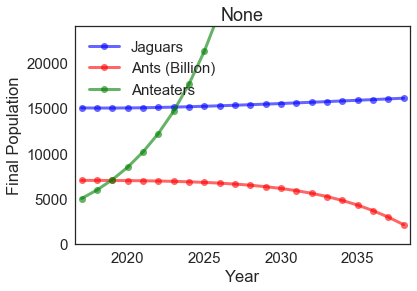

In [131]:
run_simulation(system)
plot_results(system)

In [132]:
def sweep_eater_birth(p_start, p_end, p_step):
# parameter sweep for eater_birth_rate
    
    p_array = linspace(p_start, p_end, p_step)
    
    for eater_birth_rate in p_array:
        system.eater_birth_rate=eater_birth_rate
        run_simulation(system)
        
        #for debugging        
        plot_results(system, title="Eater Birth Rate Affect on Population", xLabel="Eater Birth Rate")

1.0
1.0
119132.043629
3531476.19445
54713215.6015


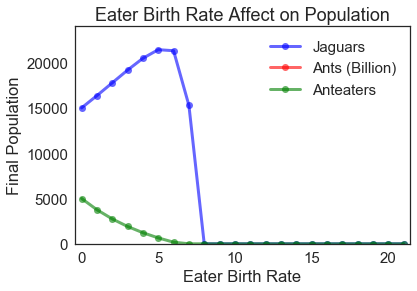

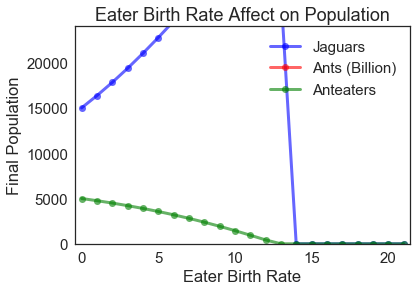

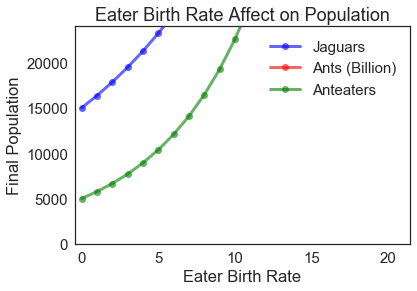

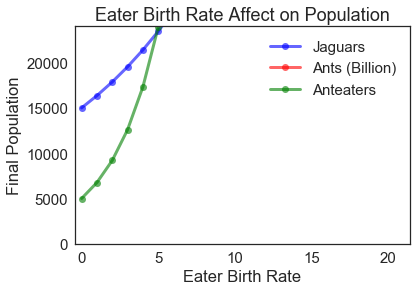

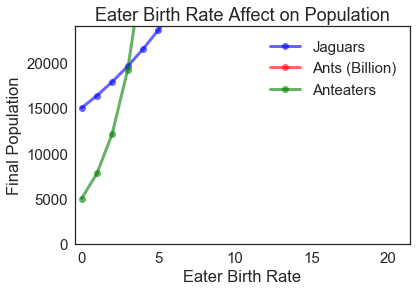

In [100]:
sweep_eater_birth(0.1, 0.9, 5)

In [44]:
def sweep_eater_death(p_start, p_end, p_step):
# parameter sweep for eater_death_rate
    
    p_array = linspace(p_start, p_end, p_step)
    
    for eater_death_rate in p_array:
        system.eater_death_rate=eater_death_rate
        run_simulation(system)
        
        #for debugging
        print (system.eater[system.t_end])
        
        newfig
        plot(system.eater_death_rate, "bo")

612945230.941
380823263.277
233823000.247
141785260.156
84848359.3155
50069875.5714
29109657.4227
16656097.863
9368152.16742
5171736.61645
2797126.85912
1478468.59025
761081.065531
379560.55747
181783.610108
82256.9213411
33954.9956216
11624.7000294
2102.06146555
1.0


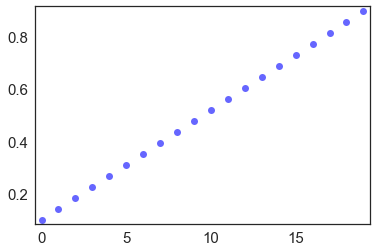

In [45]:
sweep_eater_death(0.1, 0.9, 20)

In [68]:
def sweep_jag_eat(p_start, p_end, p_step):
# parameter sweep for jag_eat_rate
    ts1 = TimeSeries()
    ts2 = TimeSeries()
    p_array = linspace(p_start, p_end, p_step)
    
    for jag_eat_rate in p_array:
        system.jag_eat_rate=jag_eat_rate
        run_simulation(system)
        
        ts1=system.jag_eat_rate
        ts2=system.t_end
        
        #for debugging
        
        plot(ts1, "bo")

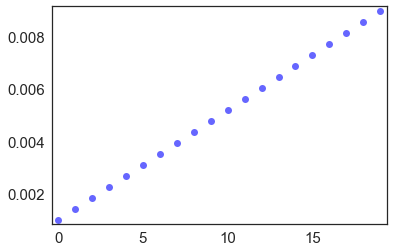

In [69]:
sweep_jag_eat(0.001,0.009,20)

In [15]:
def sweep_eater_eat(p_start, p_end, p_step):
# parameter sweep for eater_eat_rate
    
    p_array = linspace(p_start, p_end, p_step)
    
    for eater_eat_rate in p_array:
        system.eater_eat_rate=eater_eat_rate
        run_simulation(system)
        
        #for debugging
        print (system.ant[system.t_end])
        
        #plot(eater_eat_rate, system.ant[system.t_end])

1.66262836503e+19
1.66262836503e+19
1.66262836503e+19
1.66262836503e+19
1.66262836503e+19
1.66262836503e+19
1.66262836503e+19
1.66262836503e+19
1.66262836503e+19
1.66262836503e+19
1.66262836503e+19
1.66262836504e+19
1.66262836504e+19
1.66262836504e+19
1.66262836504e+19
1.66262836504e+19
1.66262836504e+19
1.66262836504e+19
1.66262836504e+19
1.66262836504e+19


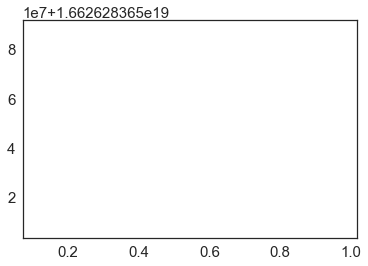

In [35]:
sweep_eater_eat(1,0.09,20)